<a href="https://colab.research.google.com/github/LordLean/Acquired-Intelligence-Adaptive-Behaviour/blob/master/AIAB_Labs/Perceptron_Logical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logical Perceptron:**

In [0]:
import numpy as np
from math import exp 
import matplotlib.pyplot as plt
import matplotlib.axes
from google.colab import files

In [0]:
class Perceptron(object):

    def __init__(self, num_inputs, epochs=1000, learning_rate=0.1):
      self.epochs = epochs # Number of iterations the learning algorithm goes through before ending defaulted to 1000 
      self.learning_rate = learning_rate # Learning rate to determine magnitude of change for our weights during step
      self.weights = np.random.rand(1,(num_inputs+1)).flatten()
      self.graph_points = list()


    def predict(self, inputs): # Inputs with a dimensions equal to that of num_inputs.
      summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
      sigmoid = 1/(1+exp(-summation)) # sigmoid function
      return sigmoid


    def train(self, training_inputs, labels):
      epoch_count = 0
      for _ in range(self.epochs+1): # This does now run for epochs+1 but it makes the graphical demo easier.
        for inputs, label in zip(training_inputs, labels): # label is expected output of the input vector stored in the `inputs` variable.
          prediction = self.predict(inputs) # pass inputs vector into predict and store in prediction
          self.weights[1:] += self.learning_rate * (label - prediction) * (prediction * (1-prediction)) * inputs
          self.weights[0] += self.learning_rate * (label - prediction) * (prediction * (1-prediction))   
  # Following code is not essential for the perceptron however is good for interpreting data.
        # Conditonal to record bias and weights at various epochs for visual demo.
        if epoch_count in np.linspace(1,self.epochs,num=4,dtype=int):
          temp_list = list([epoch_count])
          for i in range(3):
            temp_list.append(self.weights[i])
          self.graph_points.append(temp_list)
        epoch_count+=1


    def untrain(self, num_inputs):
      self.weights = np.random.rand(1,(num_inputs+1)).flatten()
      self.graph_points = list()


    def train_and_display(self, training_inputs, labels, binary=True):
      # Gate - Untrained
      gate_input = training_inputs
      # Display untrained:
      print("Untrained")
      for inputs in gate_input:
        print("Input:",inputs, round(self.predict(inputs), 4),"Output")
      print()
      # Training
      self.train(training_inputs, labels)
      # Display trained:
      print("Trained")
      for inputs in gate_input:
        # Round outputs to nearest int to return binary classification.
        if binary == False:
          print("Input:",inputs, round(self.predict(inputs), 4),"Output")
        else:
          print("Input:",inputs, int(round(self.predict(inputs))),"Output")
      print()


    def plot_epochs(self, gate_input, download=False):    
      # Counter for measuring alpha.
      alpha_count = 0
      # Plotting linear seperability across various epochs for logical inputs.
      for i in range(len(self.graph_points)):

        current_epoch = self.graph_points[i][0]
        decisionBoundary_bias = self.graph_points[i][1]
        # Weight one.
        decisionBoundary_x1 = self.graph_points[i][2]
        # Weight two.
        decisionBoundary_x2 = self.graph_points[i][3] 

        x = [(-decisionBoundary_bias / decisionBoundary_x1),0]
        y = [0,(-decisionBoundary_bias / decisionBoundary_x2)]

        # Vary alpha across decision boundaries for ease of viewing.
        alpha_count += 0.2

        if i == len(self.graph_points)-1:
          # Final decision boundary plotted in green.
          plt.plot(x,y,"g", label=(str(current_epoch)+" Epochs"))
        else:
          plt.plot(x,y,"r--",alpha=min(alpha_count,1), label=(str(current_epoch)+" Epochs")) # min to avoid alpha > 1.
        
        # Labelling plotted lines with current epoch value.
        #plt.text(x[0], y[0], current_epoch, fontsize=9)

      # Labelling legend with current epoch value per line.
      plt.legend()

      # Plotting points on scatter.
      data_x = list()
      data_y = list()
      for point in gate_input: 
        data_x.append(point[0])
        data_y.append(point[1])

      plt.style.use("ggplot")
      plt.scatter(data_x, data_y,edgecolors="blue")
      # Label data points on graph. 
      for i, txt in enumerate(zip(data_x,data_y)):
        plt.annotate(txt, (data_x[i],data_y[i]))


      # Download pyplot plots onto local machine.
      if download==True:
        plt.savefig("LogicGate.png")
        files.download("LogicGate.png")
      

To determine weights:
* predicts an output based on current weights and inputs
* compares it to expected output (label)
* updates its weights if the prediction != the label
* iterate until epoch threshold is reached

To update weights each iteration:
* finds error by subtracting the prediction from the label
* multiplies the error and the learning rate
* multiplies the result to the inputs
* adds the resulting vector to the weight vector

In [0]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

AND_output = np.array([0,0,0,1])
OR_output = np.array([0,1,1,1])

NOT_input = np.array([[0,0],[1,1]])
NOT_output = np.array([1,0])

In [0]:
perceptron_AND = Perceptron(2)
perceptron_OR = Perceptron(2)
perceptron_NOT = Perceptron(2)

In [179]:
print("AND")
perceptron_AND.train_and_display(inputs,AND_output, binary=True)
print()
print("OR")
perceptron_OR.train_and_display(inputs,OR_output)
print()
print("NOT")
perceptron_NOT.train_and_display(NOT_input,NOT_output)

AND
Untrained
Input: [0 0] 0.5653 Output
Input: [0 1] 0.7625 Output
Input: [1 0] 0.6562 Output
Input: [1 1] 0.8249 Output

Trained
Input: [0 0] 0 Output
Input: [0 1] 0 Output
Input: [1 0] 0 Output
Input: [1 1] 1 Output


OR
Untrained
Input: [0 0] 0.6825 Output
Input: [0 1] 0.8148 Output
Input: [1 0] 0.845 Output
Input: [1 1] 0.9178 Output

Trained
Input: [0 0] 0 Output
Input: [0 1] 1 Output
Input: [1 0] 1 Output
Input: [1 1] 1 Output


NOT
Untrained
Input: [0 0] 0.6648 Output
Input: [1 1] 0.871 Output

Trained
Input: [0 0] 1 Output
Input: [1 1] 0 Output



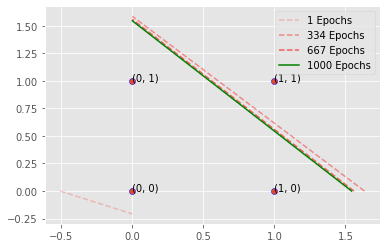

In [180]:
perceptron_AND.plot_epochs(inputs)

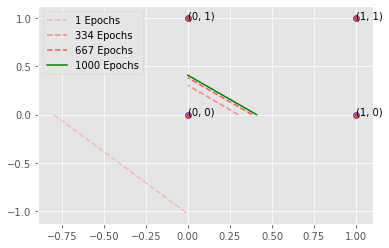

In [181]:
perceptron_OR.plot_epochs(inputs)

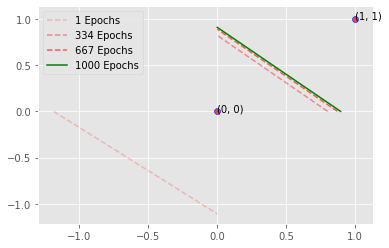

In [182]:
perceptron_NOT.plot_epochs(NOT_input)

In [123]:
'''
  def predict_old(self, inputs): # Inputs with a dimensions equal to that of num_inputs.
    summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
    if summation > 0: # Step function
      activation = 1
    else:
      activation = 0 # activation for the sake of being explicit.
    return activation

  def train_old(self, training_inputs, labels):
    for _ in range(self.epochs): 
      for inputs, label in zip(training_inputs, labels):
        # label is expected output of the input vector stored in the `inputs` variable.
        prediction = self.predict(inputs) # pass inputs vector into predict and store in prediction
        self.weights[1:] += self.learning_rate * (label - prediction) * inputs
        self.weights[0] += self.learning_rate * (label - prediction)
'''

'\n  def predict_old(self, inputs): # Inputs with a dimensions equal to that of num_inputs.\n    summation = np.dot(inputs, self.weights[1:]) + self.weights[0]\n    if summation > 0: # Step function\n      activation = 1\n    else:\n      activation = 0 # activation for the sake of being explicit.\n    return activation\n\n  def train_old(self, training_inputs, labels):\n    for _ in range(self.epochs): \n      for inputs, label in zip(training_inputs, labels):\n        # label is expected output of the input vector stored in the `inputs` variable.\n        prediction = self.predict(inputs) # pass inputs vector into predict and store in prediction\n        self.weights[1:] += self.learning_rate * (label - prediction) * inputs\n        self.weights[0] += self.learning_rate * (label - prediction)\n'

In [10]:
'''
# AND
print("Logical AND - Untrained")
for inputs in AND_input:
  print("Input:",inputs, perceptron_AND.predict(inputs),"Output")
print()
# Training - AND
perceptron_AND.train(AND_input,AND_output)
print("Logical AND - Trained")
for inputs in AND_input:
  print("Input:",inputs, round(perceptron_AND.predict(inputs),4),"Output")
print()

# OR
print("Logical OR - Untrained")
for inputs in OR_input:
  print("Input:",inputs, perceptron_OR.predict(inputs),"Output")
print()
# Training - OR
perceptron_OR.train(OR_input,OR_output)
print("Logical OR - Trained")
for inputs in OR_input:
  print("Input:",inputs, round(perceptron_OR.predict(inputs),4),"Output")
'''

'\n# AND\nprint("Logical AND - Untrained")\nfor inputs in AND_input:\n  print("Input:",inputs, perceptron_AND.predict(inputs),"Output")\nprint()\n# Training - AND\nperceptron_AND.train(AND_input,AND_output)\nprint("Logical AND - Trained")\nfor inputs in AND_input:\n  print("Input:",inputs, round(perceptron_AND.predict(inputs),4),"Output")\nprint()\n\n# OR\nprint("Logical OR - Untrained")\nfor inputs in OR_input:\n  print("Input:",inputs, perceptron_OR.predict(inputs),"Output")\nprint()\n# Training - OR\nperceptron_OR.train(OR_input,OR_output)\nprint("Logical OR - Trained")\nfor inputs in OR_input:\n  print("Input:",inputs, round(perceptron_OR.predict(inputs),4),"Output")\n'

In [11]:
''' To plot on the same plot rather than separate per epoch.
def plot_epochs(self, gate_input):    
      # Counter for measuring alpha.
      alpha_count = 0
      # Plotting linear seperability across various epochs for logical inputs.
      for i in range(len(self.graph_points)):

        current_epoch = self.graph_points[i][0]
        decisionBoundary_bias = self.graph_points[i][1]
        # Weight one.
        decisionBoundary_x1 = self.graph_points[i][2]
        # Weight two.
        decisionBoundary_x2 = self.graph_points[i][3] 

        x = [(-decisionBoundary_bias / decisionBoundary_x1),0]
        y = [0,(-decisionBoundary_bias / decisionBoundary_x2)]

        # Vary alpha across decision boundaries for ease of viewing.
        alpha_count += 0.2

        if i == len(self.graph_points)-1:
          # Final decision boundary plotted in green.
          plt.plot(x,y,"g--")
        else:
          plt.plot(x,y,"r--",alpha=min(alpha_count,1)) # min to avoid alpha > 1.
        
        # Labelling plotted lines with current epoch step.
        #plt.text(x[0], y[0], current_epoch, fontsize=9)

      # Plotting points on scatter.
      data_x = list()
      data_y = list()
      for point in gate_input: 
        data_x.append(point[0])
        data_y.append(point[1])

      plt.style.use("ggplot")
      plt.scatter(data_x, data_y,edgecolors="blue")
      # Label data points on graph. 
      for i, txt in enumerate(zip(data_x,data_y)):
        plt.annotate(txt, (data_x[i],data_y[i]))

      # Download pyplot plots onto local machine - uncomment if necessary.
      #plt.savefig("LogicGate.png")
      #files.download("LogicGate.png")
'''

' To plot on the same plot rather than separate per epoch.\ndef plot_epochs(self, gate_input):    \n      # Counter for measuring alpha.\n      alpha_count = 0\n      # Plotting linear seperability across various epochs for logical inputs.\n      for i in range(len(self.graph_points)):\n\n        current_epoch = self.graph_points[i][0]\n        decisionBoundary_bias = self.graph_points[i][1]\n        # Weight one.\n        decisionBoundary_x1 = self.graph_points[i][2]\n        # Weight two.\n        decisionBoundary_x2 = self.graph_points[i][3] \n\n        x = [(-decisionBoundary_bias / decisionBoundary_x1),0]\n        y = [0,(-decisionBoundary_bias / decisionBoundary_x2)]\n\n        # Vary alpha across decision boundaries for ease of viewing.\n        alpha_count += 0.2\n\n        if i == len(self.graph_points)-1:\n          # Final decision boundary plotted in green.\n          plt.plot(x,y,"g--")\n        else:\n          plt.plot(x,y,"r--",alpha=min(alpha_count,1)) # min to avoid a